In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
#fja koju aproksimiramo
def target(x,y):
    return (x)**2 + y;

def Relu(x):
    return x if (x > 0) else 0;

Relu = np.vectorize(Relu)

def dRelu(x):
    return 1e-9 if x<=0 else 1;

dRelu = np.vectorize(dRelu)

def Sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

Sigmoid = np.vectorize(Sigmoid)

def dSigmoid(x):
    return (1 - Sigmoid(x)) * Sigmoid(x)

dSigmoid = np.vectorize(dSigmoid)

In [3]:
#fja greske
#Hl je poslednji sloj, Y je tacna vrednost
def Error(Hl,Y):
    return ((Hl-Y)**2)

def dError(Hl,Yl):
    return 2* (Hl-Yl)*Hl

In [4]:
#init
def setUpW(L):
    W = []
    n = len(L)-1
    for i in range (0,n):
        if i == n-1:
            # u poslednjem sloju sve tezine su 1
            W.append(np.ones((L[i+1],L[i])))
        else:    
            W.append( 0.01 * np.random.randn(L[i+1],L[i]))
    return W


# init bias
def setUpB(L):
    B = []
    n = len(L)-1
    for i in range (0,n):
        if i == n-1:
            B.append( np.zeros((L[i+1],1)))
        else:
            B.append( np.zeros((L[i+1],1)))
    return B

In [5]:
def forwardPass(X,W,B,L,activation):
    n = len(L)-1
    H = []
    H.append(copy.deepcopy(X))
    for i in range(0,n):
        if i == n-1:
            H.append( W[i].dot(H[-1]) + B[i] )
        else:
            H.append( activation( W[i].dot(H[-1]) + B[i] ) )
    return H

def backwardPass(H, W, B, L, Yl, dActivation):
    d = dError(H[-1],Yl) #izvod greske
    k = len(L) -1
    dW = []
    dB = []
    while k > 0:
        if k == len(L)-1:
            d = d * np.ones(H[k].shape)   
        else:
            d= d * dActivation(H[k])
        
        dB.insert(0, d )
        dW.insert(0, d * H[k-1].T )
        
        d = W[k-1].T.dot(d)
        k-=1
    
    return (dW,dB)

In [6]:
def iteracija(X, Y, W, B, L, ni, reg_param, Activation, dActivation):
    H = forwardPass(X, W, B, L, Activation)
    E = Error(H[-1], Y)
    R = 0
    for i in range(0, len(W)-1):
        R += np.sum(W[i]**2) 
        
    R *= (reg_param * 0.5)
    Loss = E + R
    
    (dW, dB) = backwardPass(H, W, B, L, Y, dActivation)
    
    newW = []
    newB = []
    k = len(W)
    for i in range(0,k):
        if i == k-1:
            newW.append(np.ones(W[i].shape))
            newB.append(np.zeros(B[i].shape))
        else:
            newW.append( W[i] - ni * dW[i] - ni * reg_param * W[i])
            newB.append( B[i] - ni * dB[i])
            
    return (newW, newB, Loss[0])

In [7]:
def generate_train_data(size,L):
    X = 10 * np.random.randn(size,L[0],1)
    
    #normalizacija
    X -= np.mean(X,axis=0)
    X /= np.std(X, axis = 0)

    Y = target(X[:,0,0], X[:,1,0])
    
    return (X,Y)

def generate_test_data(size,L):
    X = 5*np.random.randn(size,L[0],1) 
    Y = target(X[:,0,0], X[:,1,0])
    
    return (X,Y)

In [8]:
def train(X, Y, W, B, L, ni, reg_param, activation):
    if activation == 'relu':
        Activation = Relu
        dActivation = dRelu
    elif activation == 'sigmoid':
        Activation = Sigmoid
        dActivation = dSigmoid
    else:
        Activation = None
        dActivation = None
    k = len(X)-1
    lossList = []
    for i in range(0,k):
        (W, B, Loss) = iteracija(X[i], Y[i], W, B, L, ni, reg_param, Activation, dActivation)
        lossList.append(Loss)
    return (lossList, W, B)

In [9]:
def test(X, Y, W, B, L, Activation):
    k = len(X)
    results = []
    for i in range(0,k):
        H = forwardPass(X[i], W, B, L, Activation)
        results.append(H[-1][0][0])
    plt.scatter(results,Y)
    plt.plot(np.arange(30), np.arange(30), 'r')
    plt.ylabel("Tacne vrednosti")
    plt.xlabel("Dobije vrednosti")

In [10]:
L = [2,97,1]
W = setUpW(L)
B = setUpB(L)

In [11]:
train_size = 200
test_size = 200

In [12]:
ni = 0.0001
reg_param = 0.001

In [13]:
(trainX, trainY) = generate_train_data(train_size, L)

In [14]:
(testX, testY) = generate_test_data(test_size, L)

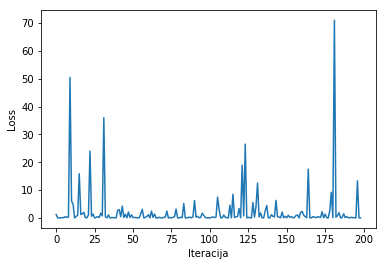

In [15]:
for i in range(0,15):
    (loss, W, B) = train(trainX, trainY, W, B, L, ni, reg_param, 'relu')
plt.plot( np.arange(len(loss)), np.array(loss))
plt.xlabel('Iteracija')
plt.ylabel('Loss')

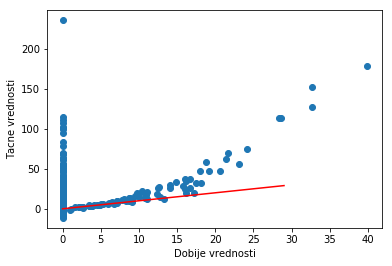

In [16]:
test(testX, testY, W, B, L, Relu)

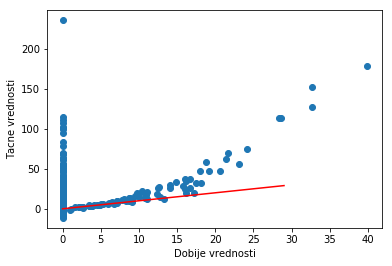

In [17]:
test(testX, testY, W, B, L, Relu)

In [18]:
a = 3
b = 20
x = np.array([a,b]).reshape(2,1)
forwardPass(x,W,B,L,Relu)[-1][0,0], target(a,b)

(16.187105378128344, 29)